# Rejection Sampling

Rejection sampling, or "accept-reject Monte Carlo" is a Monte Carlo method used to generate obsrvations from distributions. As it is a Monte Carlo it can also be used for numerical integration.

## Monte Carlo Integration

### Example: Approximation of $\pi$

Enclose a quadrant of a circle of radius $1$ in a square of side length $1$. Then uniformly sample points inside the bounds of the square in Cartesian coordinates. If the point lies inside the circle quadrant record this information. At the ends of many throws the ratio of points inside the circle to all points thrown will approximate the ratio of the area of the cricle quadrant to the area of the square

$$
\frac{\text{points inside circle}}{\text{all points thrown}} \approx \frac{\text{area of circle quadrant}}{\text{area of square}} = \frac{\pi r^2}{4\, l^2} = \frac{\pi}{4},
$$

thus, an approximation of $\pi$ can be found to be

$$
\pi \approx 4 \cdot \frac{\text{points inside circle}}{\text{all points thrown}}.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def approximate_pi(n_throws=10000, draw=True):
    n_circle_points = 0

    x_coord = np.random.uniform(0, 1, n_throws)
    y_coord = np.random.uniform(0, 1, n_throws)

    circle_x = []
    circle_y = []
    outside_x = []
    outside_y = []
    
    for x,y in zip(x_coord, y_coord):
        radius = np.sqrt(x**2 + y**2)
        if 1 > radius:
            n_circle_points += 1
            circle_x.append(x)
            circle_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)
    
    approx_pi = 4 * (n_circle_points / n_throws)
    print('The approximation of pi after {} throws is: {}'.format(n_throws, approx_pi))
    
    if draw:
        plt.plot(circle_x, circle_y, 'ro')
        plt.plot(outside_x, outside_y, 'bo')
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$')
        plt.show()

The approximation of pi after 10000 throws is: 3.1464


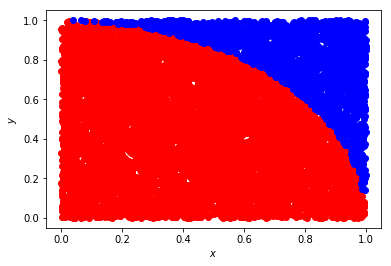

In [3]:
approximate_pi()

## Sampling Distributions

To approximate a statistical distribution one can also use accept-reject Monte Carlo to approximate the distribution.

### Example: Approximation of Gaussian Distribution

In [4]:
import scipy.stats as stats

The Gaussian has a known analytic form

$$
f\left(\vec{x}\,\middle|\,\mu, \sigma\right) = \frac{1}{\sqrt{2\pi}\, \sigma} e^{-\left(x-\mu\right)^2/2\sigma^2}
$$

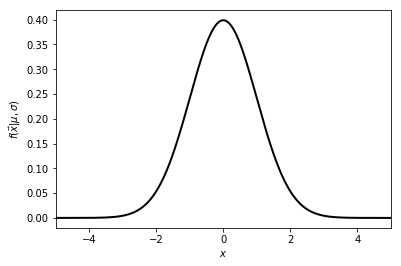

In [5]:
x = np.linspace(-5.0, 5.0, num=10000)
plt.plot(x, stats.norm.pdf(x, 0, 1), linewidth=2, color='black')

# Axes
# plt.title('Plot of  $f(x;\mu,\sigma)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(\vec{x}|\mu,\sigma)$')
# dist_window_w = sigma * 2
plt.xlim([-5, 5])
plt.show()

Given this it is seen that the Gaussian's maximum is at its mean. For the standard Gaussian this is at $\mu = 0$, and so it has a maximum at $1/\sqrt{2\pi}\,\sigma \approx 0.39$. Thus, this can be the maximum height of a rectangle that we need to throw our points in.

In [6]:
def approximate_Guassian(n_throws=10000, x_range=[-5,5], draw=True):
    n_accept = 0

    x_coord = np.random.uniform(x_range[0], x_range[1], n_throws)
    y_coord = np.random.uniform(0, stats.norm.pdf(0, 0, 1), n_throws)
    # Use Freedman–Diaconis rule
    # https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
    h = 2 * stats.iqr(x_coord)/np.cbrt([n_throws])
    n_bins = int((x_range[1] - x_range[0])/h)

    accept_x = []
    accept_y = []
    reject_x = []
    reject_y = []
    
    for x,y in zip(x_coord, y_coord):
        if stats.norm.pdf(x, 0, 1) > y:
            n_accept += 1
            accept_x.append(x)
            accept_y.append(y)
        else:
            reject_x.append(x)
            reject_y.append(y)
    
    if draw:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(1.2*14, 1.2*4.5))
        
        x_space = np.linspace(x_range[0], x_range[1], num=10000)
        axes[0].plot(accept_x, accept_y, 'ro')
        axes[0].plot(reject_x, reject_y, 'bo')
        axes[0].plot(x_space, stats.norm.pdf(x_space, 0, 1), linewidth=2, color='black')
        axes[0].set_xlabel(r'$x$')
        axes[0].set_ylabel(r'$y$')
        axes[0].set_title(r'Sampled space of $f(\vec{x}|\mu,\sigma)$')
        
        hist_count, bins, _ = axes[1].hist(accept_x, n_bins, normed=True)
        axes[1].set_xlabel(r'$x$')
        axes[1].set_ylabel('Arbitrary normalized units')
        axes[1].set_title(r'Normalized binned distribution of accepted toys')
        
        plt.xlim(x_range)
        plt.show()

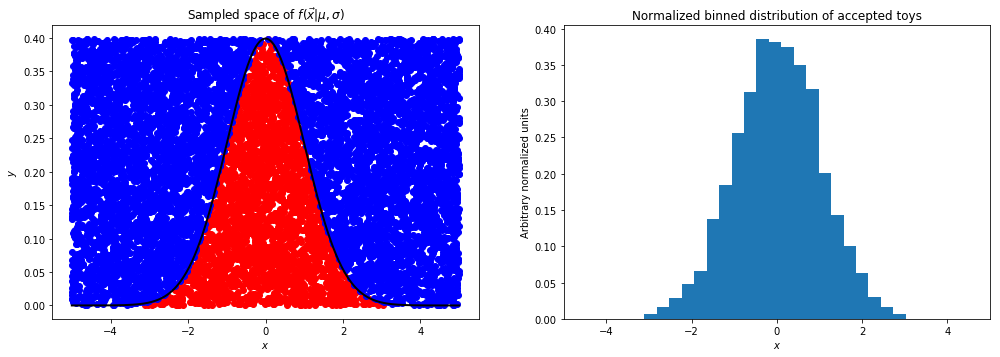

In [7]:
approximate_Guassian()

This exercise is trivial but for more complex functional forms with more difficult integrals it can be a powerful numerical technique.